## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

# Combine the data into a single dataset
total_study_df = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')

total_study_df.head()
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
total_study_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [4]:
len(mouse_metadata)

249

In [5]:
len(study_results)

1893

In [6]:
merging = mouse_metadata.groupby('Drug Regimen').count()
merging["Mouse ID"].sum()

249

In [7]:
pd.set_option('display.max_rows', total_study_df.shape[0]+1)

In [8]:
total_study_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [9]:
check_for_error = total_study_df['Mouse ID']
check_for_error.sort_values()
check_for_error.value_counts()
len(check_for_error.value_counts())
#Number of Mice

249

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#any mouse that has a value over 1
check_for_error = total_study_df['Mouse ID']
check_for_error.sort_values()
check_for_error.value_counts()


g989    13
c282    10
l700    10
w422    10
a897    10
c264    10
c139    10
e662    10
e227    10
l661    10
q511    10
s710    10
j296    10
q787    10
m550    10
h246    10
z578    10
t565    10
v923    10
k403    10
d251    10
y478    10
a444    10
s508    10
e213    10
w350    10
s337    10
j365    10
y793    10
y865    10
a644    10
l897    10
a685    10
a401    10
z969    10
c758    10
u196    10
b879    10
g288    10
a203    10
x822    10
o331    10
m957    10
p189    10
m269    10
x773    10
l509    10
g791    10
w151    10
i334    10
k894    10
y769    10
j119    10
o795    10
j989    10
t198    10
i901    10
r554    10
c757    10
g570    10
e476    10
a251    10
n304    10
t718    10
c402    10
p438    10
c832    10
m601    10
c302    10
j913    10
a492    10
i738    10
k210    10
g316    10
n364    10
k483    10
b559    10
t451    10
b128    10
o926    10
z581    10
i557    10
r944    10
w575    10
i177    10
q633    10
p136    10
k862    10
g296    10
a275    10
b742    10

In [11]:
total_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [12]:
# Optional: Get all the data for the duplicate mouse ID. 



In [13]:
total_study_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
total_study_df = total_study_df[['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Timepoint']]

total_study_drop_df = total_study_df.drop_duplicates(subset=['Mouse ID'], keep='last')

total_study_drop_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Timepoint
9,k403,Ramicane,Male,21,16,22.050126,1,45
19,s185,Capomulin,Female,3,17,23.343598,1,45
29,x401,Capomulin,Female,16,15,28.484033,0,45
39,m601,Capomulin,Male,22,17,28.430964,1,45
49,g791,Ramicane,Male,11,16,29.128472,1,45


In [15]:
total_study_drop_df = total_study_drop_df.reset_index(drop=True)

In [16]:
total_study_drop_df.loc[total_study_drop_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Timepoint
107,g989,Propriva,Female,21,26,62.57088,2,35


In [17]:
total_study_drop_df = total_study_drop_df.drop(total_study_drop_df.index[[107]]) 

In [18]:
total_study_drop_df.loc[total_study_drop_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Timepoint


In [19]:
# Checking the number of mice in the clean DataFrame.
len(total_study_drop_df)

248

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
study_mean = total_study_drop_df['Tumor Volume (mm3)'].mean() 
study_median = total_study_drop_df['Tumor Volume (mm3)'].median()
# This method is the most straighforward, creating multiple series and putting them all together at the end.
study_variance = np.var(total_study_drop_df['Tumor Volume (mm3)'])
study_std = total_study_drop_df['Tumor Volume (mm3)'].std()
study_sem = total_study_drop_df['Tumor Volume (mm3)'].sem()

study_dict = {"Mean":[study_mean], "Median":[study_median], "Variance":[study_variance], 
             "Standard Deviation": [study_std], "SEM": [study_sem]}

study_dict_df = pd.DataFrame(study_dict)

study_dict_df

,Mean,Median,Variance,Standard Deviation,SEM
0,54.968606,55.793278,159.918947,12.671479,0.80464


In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_df = total_study_drop_df.groupby(['Drug Regimen']).mean()
mean_df = mean_df['Tumor Volume (mm3)']
median_df = total_study_drop_df.groupby(['Drug Regimen']).median()
median_df = median_df['Tumor Volume (mm3)']

variance_df = total_study_drop_df.groupby(['Drug Regimen']).var()
variance_df = variance_df['Tumor Volume (mm3)']
variance_df

std_df = total_study_drop_df.groupby(['Drug Regimen']).std()
std_df = std_df['Tumor Volume (mm3)']
std_df

sem_df = total_study_drop_df.groupby(['Drug Regimen']).sem()
sem_df = sem_df['Tumor Volume (mm3)']
sem_df


# This method produces everything in a single groupby function
summary_df = pd.merge(mean_df, median_df, on="Drug Regimen")
summary_df = pd.merge(summary_df, variance_df, on="Drug Regimen")
summary_df = summary_df.rename(columns={"Tumor Volume (mm3)_x":"Mean",
                                        "Tumor Volume (mm3)_y":"Median",
                                        "Tumor Volume (mm3)":"Variance"})
summary_df = pd.merge(summary_df, std_df, on="Drug Regimen")
summary_df = summary_df.rename(columns={"Tumor Volume (mm3)":"Std"})
summary_df = pd.merge(summary_df, sem_df, on="Drug Regimen")
summary_df = summary_df.rename(columns={"Tumor Volume (mm3)":"SEM"})


summary_df
#summary_df

,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.493884,55.591622,70.822755,8.415626,1.717832
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar and Pie Charts

In [22]:
drugs_per_mouse_df = total_study_drop_df.groupby(['Drug Regimen']).count()
drugs_per_mouse_df = drugs_per_mouse_df["Mouse ID"]
drugs_per_mouse_df

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Number of Mice')

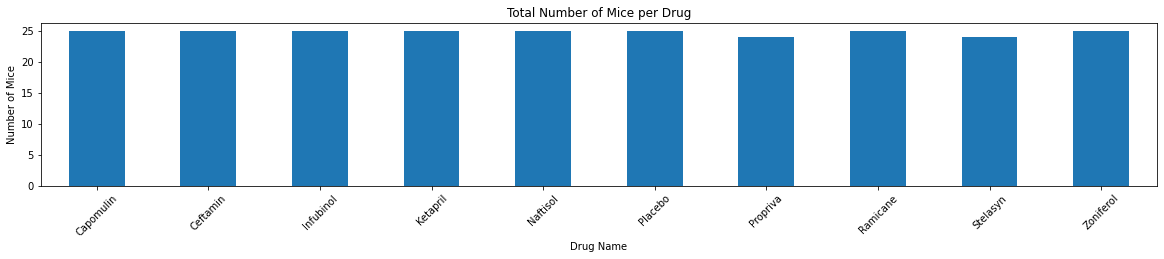

In [96]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

drugs_per_mouse_df.plot(kind="bar", figsize=(20,3), rot=45)
plt.title("Total Number of Mice per Drug")
plt.xlabel("Drug Name")
plt.ylabel("Number of Mice")

In [23]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 



In [24]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



In [25]:
gender_df = total_study_drop_df.groupby(['Sex']).count()
gender_df = gender_df['Mouse ID']
gender_df

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

In [26]:
#returning the index here


In [27]:
gender_df.index

Index(['Female', 'Male'], dtype='object', name='Sex')

([<matplotlib.patches.Wedge at 0x1211d7880>,
 [Text(-0.7829277575363617, -0.9094086685748517, 'Female'),
  Text(0.7176837777416649, 0.8336246128602806, 'Male')],
 [Text(-0.45670785856287766, -0.5304883900019968, '49.6%'),
  Text(0.39146387876818084, 0.4547043342874257, '50.4%')])

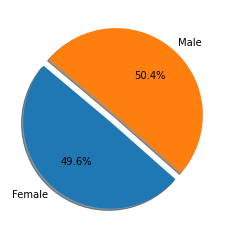

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = gender_df.index
explode = (0.1, 0)
plt.pie(gender_df, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)


In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
drug_df = total_study_drop_df.groupby(['Drug Regimen']).mean()
drug_df

I don't want to do a groupby I need to take a look at the dataframe


In [32]:
total_study_drop_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Timepoint
0,k403,Ramicane,Male,21,16,22.050126,1,45
1,s185,Capomulin,Female,3,17,23.343598,1,45
2,x401,Capomulin,Female,16,15,28.484033,0,45
3,m601,Capomulin,Male,22,17,28.430964,1,45
4,g791,Ramicane,Male,11,16,29.128472,1,45


I would like to sort Drug Regimen, but doesn't matter


In [38]:
total_study_drugs_df = total_study_drop_df.loc[(total_study_drop_df["Drug Regimen"] == "Capomulin") | (total_study_drop_df["Drug Regimen"] == "Ramicane") | (total_study_drop_df["Drug Regimen"] == "Infubinol") | (total_study_drop_df["Drug Regimen"] == "Ceftamin") , :]

In [39]:
total_study_drugs_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Timepoint
0,k403,Ramicane,Male,21,16,22.050126,1,45
1,s185,Capomulin,Female,3,17,23.343598,1,45
2,x401,Capomulin,Female,16,15,28.484033,0,45
3,m601,Capomulin,Male,22,17,28.430964,1,45
4,g791,Ramicane,Male,11,16,29.128472,1,45
5,s508,Ramicane,Male,1,17,30.276232,0,45
6,f966,Capomulin,Male,16,17,30.485985,0,20
7,m546,Ramicane,Male,18,16,30.564625,1,45
8,z578,Ramicane,Male,11,16,30.638696,0,45
9,j913,Ramicane,Female,4,17,31.560470,1,45


In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

#total_study_drop_df = total_study_df.drop_duplicates(subset=['Mouse ID'], keep='last')

#already dropped in the top cell.

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [56]:
drug_volume.head()

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,22.050126
1,Capomulin,23.343598
2,Capomulin,28.484033
3,Capomulin,28.430964
4,Ramicane,29.128472


In [60]:
drug_volume = total_study_drugs_df[['Drug Regimen', 'Tumor Volume (mm3)']]

# Capomulin, Ramicane, Infubinol, and Ceftamin

Ramicane = []
Capomulin = []
Infubinol = []
Ceftamin = []

for index, row in drug_volume.iterrows():
    if row['Drug Regimen'] == "Ramicane":
        Ramicane.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == "Capomulin":
        Capomulin.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == "Infubinol":
        Infubinol.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == "Ceftamin":
        Ceftamin.append(row['Tumor Volume (mm3)'])

In [67]:
Infubinol = np.asarray(Infubinol)
Capomulin = np.asarray(Capomulin)
Ramicane = np.asarray(Ramicane)
Ceftamin = np.asarray(Ceftamin)

In [75]:
data_to_plot = [Infubinol, Capomulin, Ramicane, Ceftamin]

In [ ]:
np.asarray(a)

In [89]:
drug_volume_Infubinol = total_study_drop_df.loc[total_study_drop_df["Drug Regimen"] == "Infubinol"]
drug_volume_Infubinol

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Timepoint
49,a203,Infubinol,Female,20,23,67.973419,2,45
50,a251,Infubinol,Female,21,25,65.525743,1,45
57,a577,Infubinol,Female,6,25,57.031862,2,30
58,a685,Infubinol,Male,8,30,66.083066,3,45
70,c139,Infubinol,Male,11,28,72.226731,2,45


In [95]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = drug_volume_Infubinol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor_size is: {lowerq}")
print(f"The upper quartile of tumor_size is: {upperq}")
print(f"The interquartile range of tumor_size is: {iqr}")
print(f"The the median of tumor_size is: {quartiles[0.5]} ")

    # Locate the rows which contain mice on each drug and get the tumor volumes
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
drug_volume_Infubinol.loc[drug_volume_Infubinol["Tumor Volume (mm3)"] < 36.832]
#this is a potential outlier


    

The lower quartile of tumor_size is: 54.04860769
The upper quartile of tumor_size is: 65.52574285
The interquartile range of tumor_size is: 11.477135160000003
The the median of tumor_size is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Timepoint
74,c326,Infubinol,Female,18,25,36.321346,0,5


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


[Text(1, 0, 'Infubinol'),
 Text(2, 0, 'Capomulin'),
 Text(3, 0, 'Ramicane'),
 Text(4, 0, 'Ceftamin')]

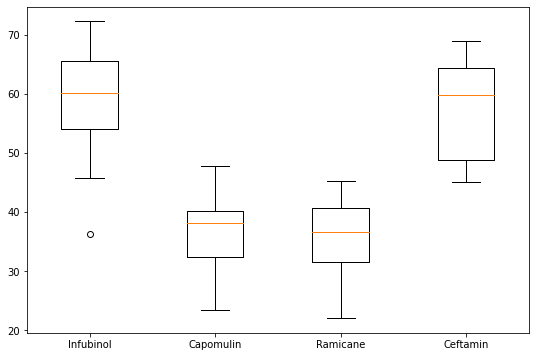

In [80]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

ax.set_xticklabels(["Infubinol", "Capomulin", "Ramicane", "Ceftamin"])


## Line and Scatter Plots

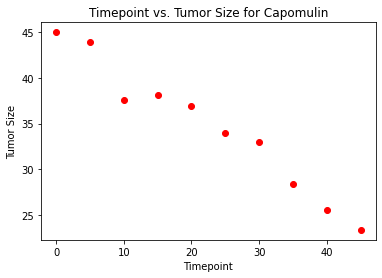

In [106]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#use mouse s185

total_study_capomulin_df = total_study_df.loc[total_study_df["Mouse ID"] == "s185"]
total_study_capomulin_df
timepoint_capomulin = total_study_capomulin_df["Timepoint"]
tumor_size_capomulin = total_study_capomulin_df["Tumor Volume (mm3)"]
plt.title('Timepoint vs. Tumor Size for Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Size')
plt.scatter(timepoint_capomulin, tumor_size_capomulin, marker="o", color="red")
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
total_study_capomulin_df = total_study_df.loc[total_study_df["Mouse ID"] == "s185"]
total_study_capomulin_df
timepoint_capomulin = total_study_capomulin_df["Timepoint"]
tumor_size_capomulin = total_study_capomulin_df["Tumor Volume (mm3)"]
plt.title('Timepoint vs. Tumor Size for Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Size')
plt.scatter(timepoint_capomulin, tumor_size_capomulin, marker="o", color="red")
plt.show()

In [107]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
total_study_capomulin_df = total_study_df.loc[total_study_df["Mouse ID"] == "s185"]
total_study_capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Timepoint
10,s185,Capomulin,Female,3,17,45.000000,0,0
11,s185,Capomulin,Female,3,17,43.878496,0,5
12,s185,Capomulin,Female,3,17,37.614948,0,10
13,s185,Capomulin,Female,3,17,38.177232,0,15
14,s185,Capomulin,Female,3,17,36.866876,0,20
15,s185,Capomulin,Female,3,17,33.949940,0,25
16,s185,Capomulin,Female,3,17,32.959671,1,30
17,s185,Capomulin,Female,3,17,28.328531,1,35
18,s185,Capomulin,Female,3,17,25.472143,1,40
19,s185,Capomulin,Female,3,17,23.343598,1,45


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
